In [1]:
# load packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# classes and functions from 'util'
from util.data_load import returns_load
from util.GarchEstimator import GarchEstimator
from util.DescStat import DescStat
from util.ANN_core import NeuralNetwork

In [3]:
from util.ANN_core import lLik

In [4]:
start_dt = '2000-01-01'
end_dt = '2020-03-01'
ticker = 'MSFT' 
interval = '1d'
garch_init = {
    'alpha' : 0.7,
    'beta1' : 0.3,
    'beta2' : 0.1,
    'omega1' : 0.01,
    'omega2' : 0.01,
    'omega3' : 0.01
}

In [5]:
ret_data = returns_load(ticker=ticker,
                    interval=interval,
                    start_dt=start_dt,
                    end_dt=end_dt)

[*********************100%***********************]  1 of 1 completed


In [6]:
garch =  GarchEstimator(theta_init = garch_init)

In [7]:
ret_data['garch'] = garch.fit_data(
    method='GARCH',
    data_estimate=ret_data['return']*100,
    data_fit=ret_data['return']*100
    
)
print(garch.get_estimates(coef=True, llik=True))

`xtol` termination condition is satisfied.
Number of iterations: 465, function evaluations: 3038, CG iterations: 1361, optimality: 5.55e-04, constraint violation: 0.00e+00, execution time: 6.9e+02 s.
Model recalculated!
 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 1361
      cg_stop_cond: 4
            constr: [array([1.72537362e-01, 1.10906902e-01, 8.65658474e-02, 7.80671466e-06,
       4.79330203e-01, 2.81250032e-01])]
       constr_nfev: [0]
       constr_nhev: [0]
       constr_njev: [0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 693.6266660690308
               fun: 9766.09531323833
              grad: array([-4.02832031e-03, -3.41796875e-03, -4.88281250e-03,  5.17895508e+00,
       -2.80761719e-03, -7.56835938e-03])
               jac: [<6x6 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>]
   lagrangian_grad: array([-1.16451627e-04, -4.15315

C:\Users\sskor\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


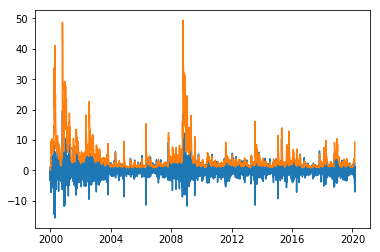

In [8]:
x = ret_data['dt']
y1 = ret_data['return']*100
y2 = ret_data['garch']
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

In [9]:
desc_obj = DescStat(data=ret_data['return']*100)

In [10]:
ret_data_enriched = pd.DataFrame({
    'dt': ret_data['dt'],
    'return100' : ret_data['return']*100,
    'garch': ret_data['garch'],
    'mean5_return100': desc_obj.calc_mean(window=5),
    'var5_return100': desc_obj.calc_var(window=5),
})

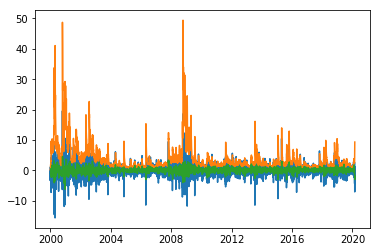

In [11]:
x = ret_data_enriched['dt']
y1 = ret_data_enriched['return100']
y2 = ret_data_enriched['garch']
y3 = ret_data_enriched['mean5_return100']
y4 = ret_data_enriched['var5_return100']
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y4)
plt.show()

In [12]:
ret_data_enriched.head(10)

,dt,return100,garch,mean5_return100,var5_return100
0,2000-01-03,-0.160600,0.100000,NaN,NaN
1,2000-01-04,-3.378016,0.100000,NaN,NaN
2,2000-01-05,1.054384,0.100000,NaN,NaN
3,2000-01-06,-3.349808,1.359696,NaN,NaN
4,2000-01-07,1.306818,1.589353,-0.905444,-0.905444
5,2000-01-10,0.729108,2.013196,-0.727503,-0.727503
6,2000-01-11,-2.561247,1.523586,-0.564149,-0.564149
7,2000-01-12,-3.257143,2.358107,-1.426454,-1.426454
8,2000-01-13,1.890136,3.213548,-0.378466,-0.378466
9,2000-01-14,4.115942,3.045986,0.183359,0.183359


In [13]:
ret_data_enriched.shape

(5071, 5)

In [14]:
ret_data_enriched.dropna(inplace=True)
ret_data_enriched.shape

(5067, 5)

In [15]:
NN_obj = NeuralNetwork(
    x=ret_data_enriched.iloc[:,2:5],
    y=ret_data_enriched.iloc[:,1:2],
    obj_fun=lLik,
    hidden_layer=1,
)

In [16]:
NN_obj.feedforward()

In [17]:
NN_obj.backprop()

C:\Users\sskor\Documents\uni\CZ\5.rocnik\diplomka\util\ANN_core.py:78: RuntimeWarning: invalid value encountered in sqrt
  LLik_der = - 1 / sigma_pred ** (1/2) + (1 / sigma_pred ** (3/2)) * (obs_val)
C:\Users\sskor\Documents\uni\CZ\5.rocnik\diplomka\util\ANN_core.py:78: RuntimeWarning: invalid value encountered in power
  LLik_der = - 1 / sigma_pred ** (1/2) + (1 / sigma_pred ** (3/2)) * (obs_val)


In [18]:
NN_obj.feedforward()

In [22]:
NN_obj.get_weights()

[array([[nan],
        [nan],
        [nan]]), array([[nan]]), array([[nan]])]

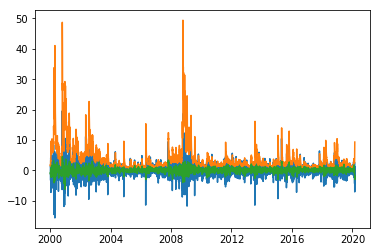

In [20]:
x = ret_data_enriched['dt']
y1 = ret_data_enriched['return100']
y2 = ret_data_enriched['garch']
y3 = ret_data_enriched['mean5_return100']
y4 = ret_data_enriched['var5_return100']
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y4)
plt.show()